In [1]:
import json
import pickle

import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML

from Utility.Plots import plot_live_data, plot_train_data, plot_steps_taken
from Utility.TabularEpsilonStrategy import EpsilonGreedy

%config InlineBackend.figure_formats = ['svg']

## Q-Learning

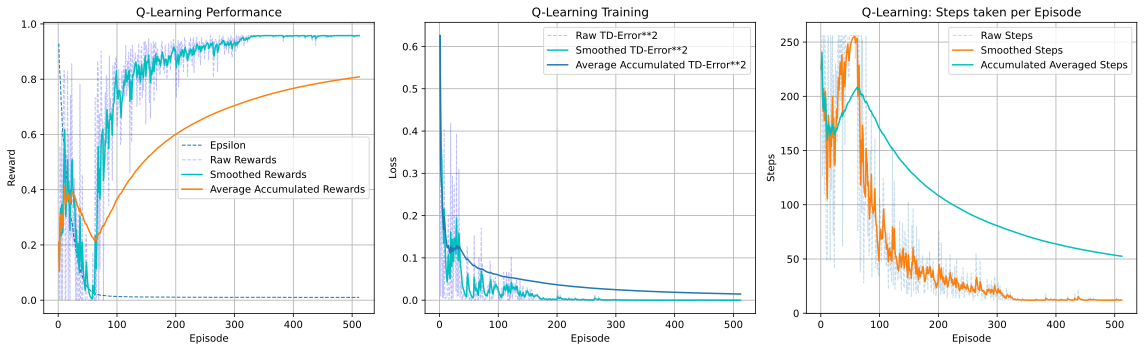

In [2]:
with open('Q_Learning/QLearning_live_plot.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plot_live_data(data['episode'], data['rewards'], epsilon=data['epsilons'],
               title={'title': "Q-Learning Performance", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc'  : 'Average Accumulated Rewards', 'xlab': 'Episode', 'ylab': 'Reward'})
plt.subplot(132)
plot_train_data(data['episode'], data['losses'],
                {'title': "Q-Learning Training", 'raw': 'Raw TD-Error**2', 'smooth': 'Smoothed TD-Error**2',
                 'acc'  : 'Average Accumulated TD-Error**2', 'xlab': 'Episode', 'ylab': 'Loss'})
plt.subplot(133)
plot_steps_taken(data['episode'], data['steps_taken'], "Q-Learning")
plt.tight_layout()
# plt.savefig('report/figures/QLearning_episode.pdf')
# plt.savefig('report/figures/QLearning_episode.png')
plt.show()

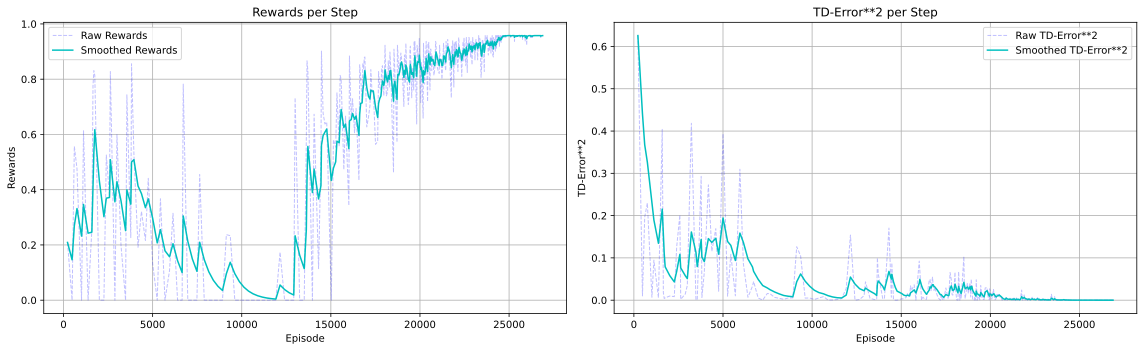

In [9]:
with open('Q_Learning/QLearning_train.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))

plt.subplot(121)
plot_live_data(data['steps_done'], data['rewards'], avg=False,
               title={'title': "Rewards per Step", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc'  : 'Cumulative Average Rewards', 'xlab': 'Episode', 'ylab': 'Rewards'})

plt.subplot(122)
plot_train_data(data['steps_done'], data['td_error_sq'], avg=False,
                title={'title' : "TD-Error**2 per Step", 'raw': 'Raw TD-Error**2',
                       'smooth': 'Smoothed TD-Error**2', 'acc': 'Cumulative Average TD-Error**2',
                       'xlab'  : 'Episode', 'ylab': 'TD-Error**2'})
plt.tight_layout()
plt.savefig('report/figures/QLearning_steps.pdf')
plt.savefig('report/figures/QLearning_steps.png')

plt.show()

In [11]:
rewards = data['rewards']
steps_taken = data['steps_taken']
finish_counter = data['finish_counter']
episodes = len(rewards)
print('====== TRAIN SUMMARY ======')
print(f'Episodes       : {episodes}')
print(f"Completion rate: {finish_counter / episodes}")
print(f"Average Reward : {sum(rewards) / episodes:.3f}")
print(f"Average steps  : {sum(steps_taken) / episodes:.3f}")

====== TRAIN SUMMARY ======
Episodes       : 512
Completion rate: 0.9296875
Average Reward : 0.808
Average steps  : 52.510


In [5]:
from Q_Learning.QLearning import eval as qlearning_eval
from Utility.MiniGrid import MiniGridHash

env = MiniGridHash(render_mode='rgb_array')
with open('Q_Learning/q_learning_table.pkl', 'rb') as f:
    qlearning_table = pickle.load(f)
qlearning_eval(env, qlearning_table, EpsilonGreedy(0, 3), 1000)

pygame 2.6.0 (SDL 2.28.4, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html
Evaluation...
====== EVALUATION SUMMARY ======
Evaluation episodes: 1000
Completion rate    : 1.0
Average Reward     : 0.958
Average steps      : 12.000


In [6]:
imgs = []
fig = plt.figure(figsize=(5, 5))
strategy = EpsilonGreedy(0, 3)
current_state = env.reset()
plt.axis('off')
im = plt.imshow(env.render(), animated=True)
imgs.append([im])
for step in range(env.maxSteps):
    action = strategy.select_action(current_state, qlearning_table)
    next_state, reward, done, truncated = env.step(action)
    im = plt.imshow(env.render(), animated=True)

    imgs.append([im])
    if done or truncated:
        break
    current_state = next_state
ani = animation.ArtistAnimation(fig, imgs, interval=100, repeat_delay=1000)
ani.save('Q_Learning/q_learning.gif', writer='imagemagickasd')
plt.close()
HTML(ani.to_jshtml())

MovieWriter imagemagickasd unavailable; using Pillow instead.


## SARSA

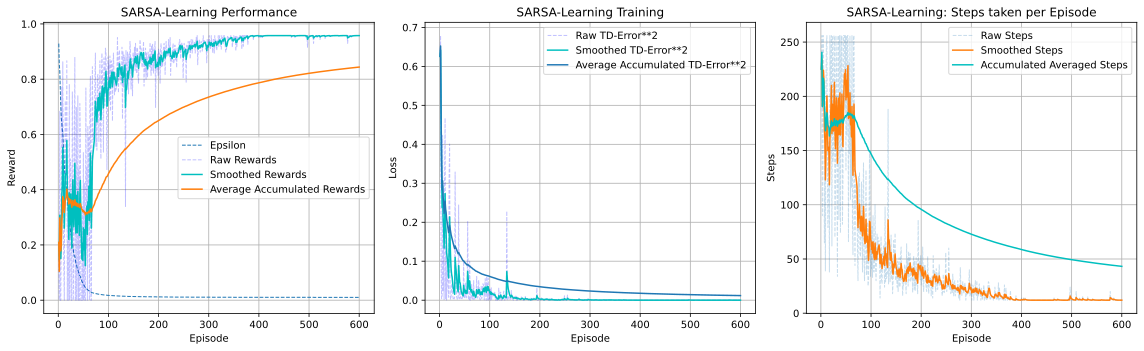

In [7]:
with open('SARSA/SARSA_live_plot.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plot_live_data(data['episode'], data['rewards'], epsilon=data['epsilons'],
               title={'title': "SARSA-Learning Performance", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc'  : 'Average Accumulated Rewards', 'xlab': 'Episode', 'ylab': 'Reward'})
plt.subplot(132)
plot_train_data(data['episode'], data['losses'],
                {'title': "SARSA-Learning Training", 'raw': 'Raw TD-Error**2', 'smooth': 'Smoothed TD-Error**2',
                 'acc'  : 'Average Accumulated TD-Error**2', 'xlab': 'Episode', 'ylab': 'Loss'})
plt.subplot(133)
plot_steps_taken(data['episode'], data['steps_taken'], "SARSA-Learning")
plt.tight_layout()
plt.savefig('report/figures/SARSALearning_episode.pdf')
plt.savefig('report/figures/SARSALearning_episode.png')
plt.show()

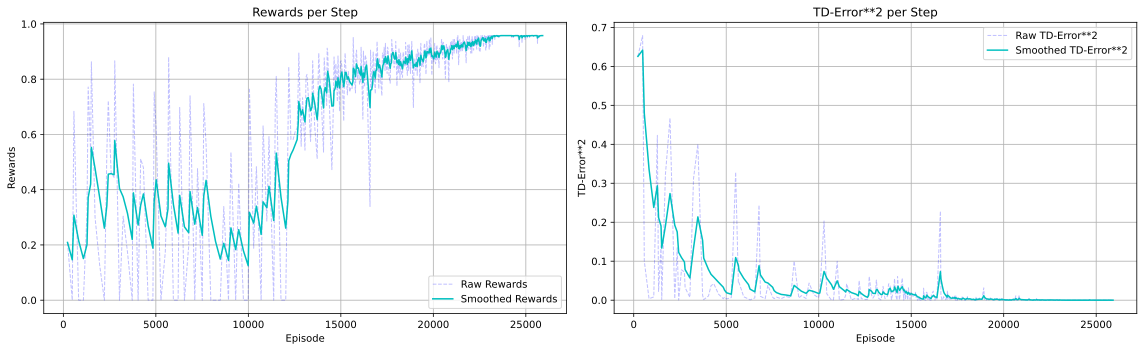

In [12]:
with open('SARSA/SARSA_train.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))

plt.subplot(121)
plot_live_data(data['steps_done'], data['rewards'], avg=False,
               title={'title': "Rewards per Step", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc'  : 'Cumulative Average Rewards', 'xlab': 'Episode', 'ylab': 'Rewards'})

plt.subplot(122)
plot_train_data(data['steps_done'], data['td_error_sq'], avg=False,
                title={'title' : "TD-Error**2 per Step", 'raw': 'Raw TD-Error**2',
                       'smooth': 'Smoothed TD-Error**2', 'acc': 'Cumulative Average TD-Error**2',
                       'xlab'  : 'Episode', 'ylab': 'TD-Error**2'})
plt.tight_layout()
plt.savefig('report/figures/SARSALearning_steps.pdf')
plt.savefig('report/figures/SARSALearning_steps.png')
plt.show()

In [13]:
rewards = data['rewards']
steps_taken = data['steps_taken']
finish_counter = data['finish_counter']
episodes = len(rewards)
print('====== TRAIN SUMMARY ======')
print(f'Episodes       : {episodes}')
print(f"Completion rate: {finish_counter / episodes}")
print(f"Average Reward : {sum(rewards) / episodes:.3f}")
print(f"Average steps  : {sum(steps_taken) / episodes:.3f}")

====== TRAIN SUMMARY ======
Episodes       : 600
Completion rate: 0.9566666666666667
Average Reward : 0.844
Average steps  : 43.185


### Evaluation

In [10]:
from SARSA.SARSA import eval as sarsa_eval
from Utility.MiniGrid import MiniGridHash

env = MiniGridHash(render_mode='rgb_array')
with open('SARSA/sarsa_learning_table.pkl', 'rb') as f:
    sarsa_table = pickle.load(f)
sarsa_eval(env, qlearning_table, EpsilonGreedy(0, 3), 1000)



Evaluation...
====== EVALUATION SUMMARY ======
Evaluation episodes: 1000
Completion rate    : 1.0
Average Reward     : 0.958
Average steps      : 12.000


In [11]:
imgs = []
fig = plt.figure(figsize=(5, 5))
strategy = EpsilonGreedy(0, 3)
current_state = env.reset()
plt.axis('off')
im = plt.imshow(env.render(), animated=True)
imgs.append([im])
for step in range(env.maxSteps):
    action = strategy.select_action(current_state, sarsa_table)
    next_state, reward, done, truncated = env.step(action)
    im = plt.imshow(env.render(), animated=True)
    imgs.append([im])
    if done or truncated:
        break
    current_state = next_state
ani = animation.ArtistAnimation(fig, imgs, interval=100, repeat_delay=1000)
ani.save('SARSA/sarsa.gif', writer='imagemagickasd')
plt.close()
HTML(ani.to_jshtml())

MovieWriter imagemagickasd unavailable; using Pillow instead.


## DQN

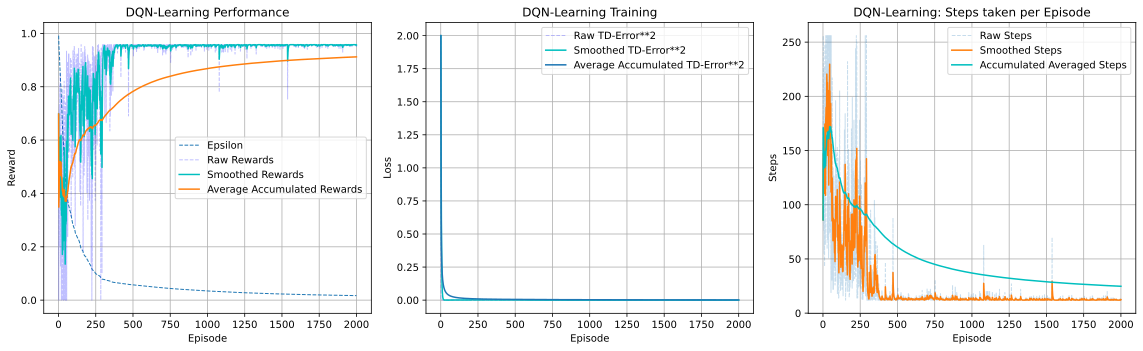

In [12]:
with open('DQN/DQN_live_plot.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plot_live_data(data['episode'], data['rewards'], epsilon=data['epsilons'],
               title={'title': "DQN-Learning Performance", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc'  : 'Average Accumulated Rewards', 'xlab': 'Episode', 'ylab': 'Reward'})
plt.subplot(132)
plot_train_data(data['episode'], data['losses'],
                {'title': "DQN-Learning Training", 'raw': 'Raw TD-Error**2', 'smooth': 'Smoothed TD-Error**2',
                 'acc'  : 'Average Accumulated TD-Error**2', 'xlab': 'Episode', 'ylab': 'Loss'})
plt.subplot(133)
plot_steps_taken(data['episode'], data['steps_taken'], "DQN-Learning")
plt.tight_layout()
plt.savefig('report/figures/DQNLearning_episode.pdf')
plt.savefig('report/figures/DQNLearning_episode.png')
plt.show()

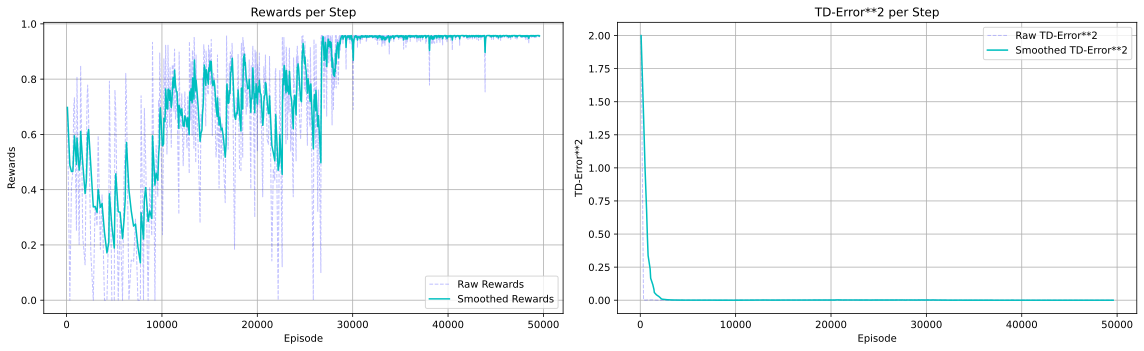

In [14]:
with open('DQN/DQN_train.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))

plt.subplot(121)
plot_live_data(data['steps_done'], data['rewards'], avg=False,
               title={'title': "Rewards per Step", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc'  : 'Cumulative Average Rewards', 'xlab': 'Episode', 'ylab': 'Rewards'})

plt.subplot(122)
plot_train_data(data['steps_done'], data['td_error_sq'], avg=False,
                title={'title' : "TD-Error**2 per Step", 'raw': 'Raw TD-Error**2',
                       'smooth': 'Smoothed TD-Error**2', 'acc': 'Cumulative Average TD-Error**2',
                       'xlab'  : 'Episode', 'ylab': 'TD-Error**2'})
plt.tight_layout()
plt.savefig('report/figures/DQNLearning_steps.pdf')
plt.savefig('report/figures/DQNLearning_steps.png')
plt.show()

In [15]:
rewards = data['rewards']
steps_taken = data['steps_taken']
finish_counter = data['finish_counter']
episodes = len(rewards)
print('====== TRAIN SUMMARY ======')
print(f'Episodes       : {episodes}')
print(f"Completion rate: {finish_counter / episodes}")
print(f"Average Reward : {sum(rewards) / episodes:.3f}")
print(f"Average steps  : {sum(steps_taken) / episodes:.3f}")

====== TRAIN SUMMARY ======
Episodes       : 2000
Completion rate: 0.992
Average Reward : 0.912
Average steps  : 24.794


## Evaluation

In [3]:
from DQN.DQN import eval as dqn_eval
from DQN.DQN import DQN
from Utility.DQNEpsilonStrategy import EpsilonGreedy as DQNEpsilonGreedy
from Utility.MiniGrid import MiniGridRaw
import torch
from torchinfo import summary

env_dqn = MiniGridRaw(render_mode='rgb_array')
policy_net = DQN(env_dqn.numStates, env_dqn.numActions, (64, 32))

In [5]:
a = env_dqn.reset()
print(summary(policy_net, input_data=a, col_names=['input_size', 'output_size', 'num_params', 'trainable']))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
DQN                                      [1, 49]                   [1, 3]                    --                        True
├─Sequential: 1-1                        [1, 49]                   [1, 3]                    --                        True
│    └─Linear: 2-1                       [1, 49]                   [1, 64]                   3,200                     True
│    └─ReLU: 2-2                         [1, 64]                   [1, 64]                   --                        --
│    └─Linear: 2-3                       [1, 64]                   [1, 32]                   2,080                     True
│    └─ReLU: 2-4                         [1, 32]                   [1, 32]                   --                        --
│    └─Linear: 2-5                       [1, 32]                   [1, 3]                    99                        True
Total p

In [15]:
policy_net.load_state_dict(torch.load('DQN/dqn.pth'))
dqn_eval(env_dqn, policy_net, DQNEpsilonGreedy(0, 3), 1000)

Evaluation...
====== EVALUATION SUMMARY ======
Evaluation episodes: 1000
Completion rate    : 1.0
Average Reward     : 0.958
Average steps      : 12.000


In [16]:
imgs = []
fig = plt.figure(figsize=(5, 5))
strategy_dqn = DQNEpsilonGreedy(0, 3)
current_state = env_dqn.reset()
plt.axis('off')
imgs.append([plt.imshow(env_dqn.render(), animated=True)])
for step in range(env.maxSteps):
    action = strategy_dqn.select_action(current_state, policy_net)
    next_state, reward, done, truncated = env_dqn.step(action)
    imgs.append([plt.imshow(env_dqn.render(), animated=True)])
    if done or truncated:
        break
    current_state = next_state
ani = animation.ArtistAnimation(fig, imgs, interval=100, repeat_delay=1000)
ani.save('DQN/dqn.gif', writer='imagemagick')
plt.close()
HTML(ani.to_jshtml())

MovieWriter imagemagick unavailable; using Pillow instead.


## DQN RGB Technique

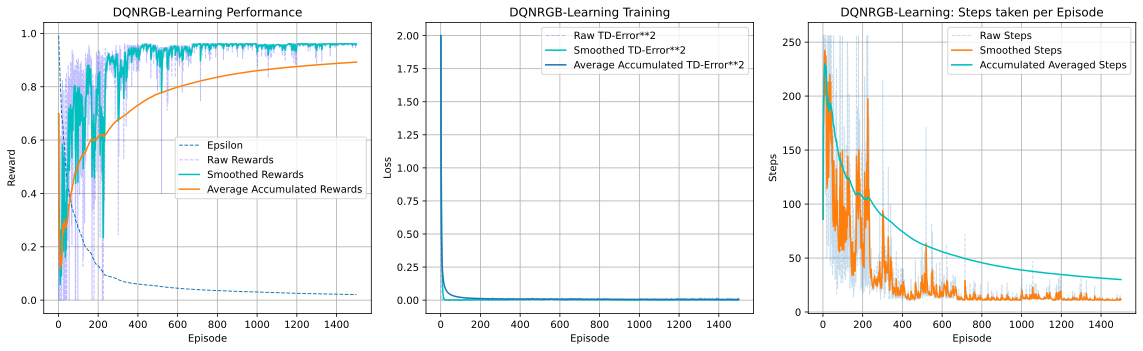

In [17]:
with open('DQN/DQNIMAGE_live_plot.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plot_live_data(data['episode'], data['rewards'], epsilon=data['epsilons'],
               title={'title': "DQNRGB-Learning Performance", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc'  : 'Average Accumulated Rewards', 'xlab': 'Episode', 'ylab': 'Reward'})
plt.subplot(132)
plot_train_data(data['episode'], data['losses'],
                {'title': "DQNRGB-Learning Training", 'raw': 'Raw TD-Error**2', 'smooth': 'Smoothed TD-Error**2',
                 'acc'  : 'Average Accumulated TD-Error**2', 'xlab': 'Episode', 'ylab': 'Loss'})
plt.subplot(133)
plot_steps_taken(data['episode'], data['steps_taken'], "DQNRGB-Learning")
plt.tight_layout()
plt.savefig('report/figures/DQNRGBLearning_episode.pdf')
plt.savefig('report/figures/DQNRGBLearning_episode.png')
plt.show()

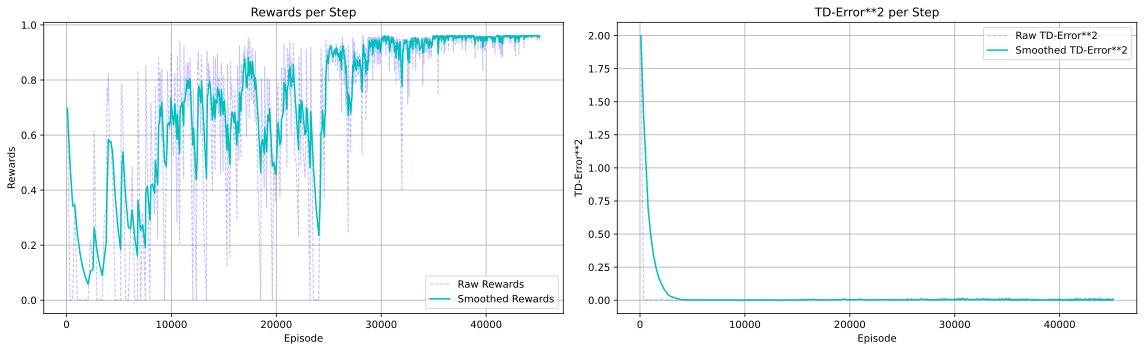

In [18]:
with open('DQN/DQNIMAGE_train.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))

plt.subplot(121)
plot_live_data(data['steps_done'], data['rewards'], avg=False,
               title={'title': "Rewards per Step", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc'  : 'Cumulative Average Rewards', 'xlab': 'Episode', 'ylab': 'Rewards'})

plt.subplot(122)
plot_train_data(data['steps_done'], data['td_error_sq'], avg=False,
                title={'title' : "TD-Error**2 per Step", 'raw': 'Raw TD-Error**2',
                       'smooth': 'Smoothed TD-Error**2', 'acc': 'Cumulative Average TD-Error**2',
                       'xlab'  : 'Episode', 'ylab': 'TD-Error**2'})
plt.tight_layout()
plt.savefig('report/figures/DQNRGBLearning_steps.pdf')
plt.savefig('report/figures/DQNRGBLearning_steps.png')
plt.show()

In [19]:
rewards = data['rewards']
steps_taken = data['steps_taken']
finish_counter = data['finish_counter']
episodes = len(rewards)
print('====== TRAIN SUMMARY ======')
print(f'Episodes       : {episodes}')
print(f"Completion rate: {finish_counter / episodes}")
print(f"Average Reward : {sum(rewards) / episodes:.3f}")
print(f"Average steps  : {sum(steps_taken) / episodes:.3f}")

====== TRAIN SUMMARY ======
Episodes       : 1500
Completion rate: 0.98
Average Reward : 0.892
Average steps  : 30.068


## Evaluation

In [1]:
from DQN.DQNIMAGE import eval as dqn_image_eval
from DQN.DQNIMAGE import CNN_DQN, FrameStack
from Utility.DQNEpsilonStrategy import EpsilonGreedy as DQNEpsilonGreedy
from Utility.MiniGrid import MiniGridImage, get_device
import torch

device = get_device()

env_dqn_img = MiniGridImage(render_mode='rgb_array')
policy_net_img = CNN_DQN(56, 56, 3).to(device)

pygame 2.6.0 (SDL 2.28.4, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
summary(policy_net_img, input_size=(1,4,56,56), device=device, col_names=['input_size', 'kernel_size','output_size', 'num_params', 'trainable'])

Layer (type:depth-idx)                   Input Shape               Kernel Shape              Output Shape              Param #                   Trainable
CNN_DQN                                  [1, 4, 56, 56]            --                        [1, 3]                    --                        True
├─Sequential: 1-1                        [1, 4, 56, 56]            --                        [1, 512]                  --                        True
│    └─Conv2d: 2-1                       [1, 4, 56, 56]            [3, 3]                    [1, 16, 27, 27]           576                       True
│    └─BatchNorm2d: 2-2                  [1, 16, 27, 27]           --                        [1, 16, 27, 27]           32                        True
│    └─ReLU: 2-3                         [1, 16, 27, 27]           --                        [1, 16, 27, 27]           --                        --
│    └─Conv2d: 2-4                       [1, 16, 27, 27]           [3, 3]                    [1, 

In [20]:
policy_net_img.load_state_dict(torch.load('DQN/dqn_image.pth', map_location=device))
dqn_image_eval(env_dqn_img, policy_net_img, DQNEpsilonGreedy(0, 3), 1000)

Evaluation...


/Users/lucien/.pyenv/versions/3.10.14/envs/torch/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


====== EVALUATION SUMMARY ======
Evaluation episodes: 1000
Completion rate    : 1.0
Average Reward     : 0.961
Average steps      : 11.000


In [21]:
imgs = []
fig = plt.figure(figsize=(5, 5))
frame_stack = FrameStack(56, 56, 4)
strategy_dqn_img = DQNEpsilonGreedy(0, 3)
current_state = env_dqn_img.reset()
current_stack = frame_stack.push(current_state, True)
plt.axis('off')
imgs.append([plt.imshow(env_dqn_img.render(), animated=True)])
for step in range(env_dqn_img.maxSteps):
    action = strategy_dqn_img.select_action(current_stack, policy_net_img)
    next_state, reward, done, truncated = env_dqn_img.step(action.item())
    next_stack = frame_stack.push(next_state, False)
    imgs.append([plt.imshow(env_dqn_img.render(), animated=True)])
    if done or truncated:
        break
    current_stack = next_stack
ani = animation.ArtistAnimation(fig, imgs, interval=100, repeat_delay=1000)
ani.save('DQN/dqn_img.gif', writer='imagemagick')
plt.close()
HTML(ani.to_jshtml())

MovieWriter imagemagick unavailable; using Pillow instead.
